In [9]:
# import json
# import pickle
# # import torch
# import numpy as np
# from Corpus import Corpus
# from transformers import AutoTokenizer, AutoModel
#
# # Load the configuration file
# with open('config.json', 'r') as f:
#     config = json.load(f)
#
# # Load the Corpus object from the saved file
# with open('data_vFF.pkl', 'rb') as f:
#     corpus = pickle.load(f)
#
# type(corpus)

In [10]:
# import pandas as pd
# corpus_df = pd.DataFrame(corpus)

In [11]:
# df= corpus_df
# df

In [12]:
# df.to_csv('final.csv',index=False)

In [13]:
import numpy as np
import pandas as pd
import nltk

In [8]:
data_frame = pd.read_csv('/content/drive/MyDrive/final.csv')
# data_frame=data_frame.sample(n=10000, random_state=42)
data_frame

,author_id,author_name,book_id,gutenbergbookid,title,text,text_lines,authoryearofbirth,authoryearofdeath,downloads,subjects,topic,Sub_A,Sub_B,Sub_C,str_text_lines,passage_key
0,494,"Lincoln, Abraham",PG8,PG8,Abraham Lincoln's Second Inaugural Address,"['to header material.', '', '***', '', ""Lincol...",17,1809.0,1865.0,25.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents,17,PG8_17
1,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,"['I have no lawful right to do so, and I have ...",77,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents,77,PG9_77
2,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,['for a minority of their own will secede from...,277,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents,277,PG9_277
3,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,"['in both cases, and a few break over in each....",327,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents,327,PG9_327
4,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,['There is some difference of opinion whether ...,127,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents,127,PG9_127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173102,22568,"Lanman, Charles",PG53940,PG53940,"Haw-Ho-Noo; Or, Records of a Tourist","['the upper one, somewhat after the manner of ...",4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4091,PG53940_4091
173103,22568,"Lanman, Charles",PG53940,PG53940,"Haw-Ho-Noo; Or, Records of a Tourist",['where the newly-born sun was just sinking in...,8041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8041,PG53940_8041
173104,22568,"Lanman, Charles",PG53940,PG53940,"Haw-Ho-Noo; Or, Records of a Tourist","['And such a supper! Our host presided, and wh...",2441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2441,PG53940_2441
173105,22568,"Lanman, Charles",PG53940,PG53940,"Haw-Ho-Noo; Or, Records of a Tourist","['himself, and you will lose him. Keep him in ...",4241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4241,PG53940_4241


In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
data_frame['topic'].unique().size

31

In [16]:
data_frame = data_frame.dropna()
data_frame

,author_id,author_name,book_id,gutenbergbookid,title,text,text_lines,authoryearofbirth,authoryearofdeath,downloads,subjects,topic,Sub_A,Sub_B,Sub_C,str_text_lines,passage_key
0,494,"Lincoln, Abraham",PG8,PG8,Abraham Lincoln's Second Inaugural Address,"['to header material.', '', '***', '', ""Lincol...",17,1809.0,1865.0,25.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents,17,PG8_17
1,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,"['I have no lawful right to do so, and I have ...",77,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents,77,PG9_77
2,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,['for a minority of their own will secede from...,277,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents,277,PG9_277
3,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,"['in both cases, and a few break over in each....",327,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents,327,PG9_327
4,494,"Lincoln, Abraham",PG9,PG9,Abraham Lincoln's First Inaugural Address,['There is some difference of opinion whether ...,127,1809.0,1865.0,36.0,{'United States -- Politics and government -- ...,United States,1861-1865,Politics and government,Presidents,127,PG9_127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169293,2429,"Longfellow, Henry Wadsworth",PG57417,PG57417,The Courtship of Miles Standish:: With Suggest...,"[' Fair-haired, azure-eyed, with delicate Sax...",938,1807.0,1882.0,68.0,"{'Standish, Myles, 1584?-1656 -- Poetry', 'Mas...",Poetry,Poetry,Massachusetts,New Plymouth,938,PG57417_938
169294,2429,"Longfellow, Henry Wadsworth",PG57417,PG57417,The Courtship of Miles Standish:: With Suggest...,"['', ' Soon was their vision disturbed by t...",2138,1807.0,1882.0,68.0,"{'Standish, Myles, 1584?-1656 -- Poetry', 'Mas...",Poetry,Poetry,Massachusetts,New Plymouth,2138,PG57417_2138
169295,2429,"Longfellow, Henry Wadsworth",PG57417,PG57417,The Courtship of Miles Standish:: With Suggest...,"[' Long have I cherished the thought, but nev...",1088,1807.0,1882.0,68.0,"{'Standish, Myles, 1584?-1656 -- Poetry', 'Mas...",Poetry,Poetry,Massachusetts,New Plymouth,1088,PG57417_1088
169296,2429,"Longfellow, Henry Wadsworth",PG57417,PG57417,The Courtship of Miles Standish:: With Suggest...,"[' England,--', ' They are in blossom no...",1238,1807.0,1882.0,68.0,"{'Standish, Myles, 1584?-1656 -- Poetry', 'Mas...",Poetry,Poetry,Massachusetts,New Plymouth,1238,PG57417_1238


In [17]:
topic_counts = data_frame['topic'].value_counts()
topic_counts

Fiction                          59245
Juvenile fiction                 22580
History                           8636
Drama                             5420
19th century                      4946
Translations into English         4710
Description and travel            3590
Short stories                     2728
United States                     2270
Biography                         1955
Great Britain                     1780
World War                         1577
English                           1291
Juvenile literature               1121
Poetry                             897
France                             796
Social life and customs            450
American                           436
England                            428
Conduct of life                    249
Adventure stories                  120
English wit and humor              120
Love stories                        60
Detective and mystery stories       60
Historical fiction                  60
Science fiction          

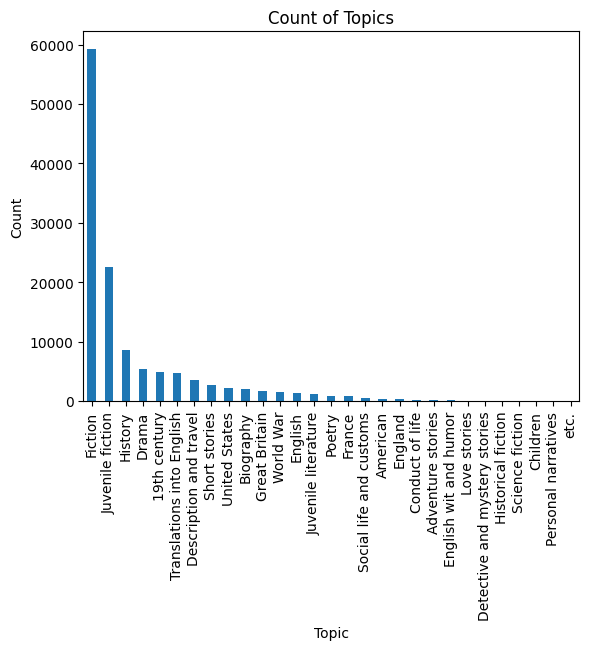

In [18]:
import matplotlib.pyplot as plt

topic_counts = data_frame['topic'].value_counts()
topic_counts.plot(kind='bar')
plt.title('Count of Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()


In [19]:
data_frame.to_csv('final_1.csv',index=False)

In [20]:
data_frame = pd.read_csv('final_1.csv', usecols=['text','topic'])
# data_frame = data_frame.sample(n=300, random_state=42)
data_frame

,text,topic
0,"['to header material.', '', '***', '', ""Lincol...",United States
1,"['I have no lawful right to do so, and I have ...",United States
2,['for a minority of their own will secede from...,United States
3,"['in both cases, and a few break over in each....",United States
4,['There is some difference of opinion whether ...,United States
...,...,...
125608,"[' Fair-haired, azure-eyed, with delicate Sax...",Poetry
125609,"['', ' Soon was their vision disturbed by t...",Poetry
125610,"[' Long have I cherished the thought, but nev...",Poetry
125611,"[' England,--', ' They are in blossom no...",Poetry


In [21]:
top_topics = data_frame['topic'].value_counts().head(10).index.tolist()

result = pd.DataFrame()

for topic in top_topics:
    temp = data_frame.loc[data_frame['topic'] == topic][:100]
    result = pd.concat([result, temp], axis=0, ignore_index=True)

data_frame=result
data_frame

,text,topic
0,"['“No.”', '', '“I will buy it of you.”', '', '...",Fiction
1,"['Bombay, for which they were now detained at ...",Fiction
2,"['', '“Well, Monsieur Fix,” said Passepartout,...",Fiction
3,"['but the intractable Fogg, as reserved as eve...",Fiction
4,"['“I am he.”', '', '“Is this man your servant?...",Fiction
...,...,...
995,['for the sake of profit send out freights in ...,Biography
996,"['your house.', '', 'Bernick: I suppose so. As...",Biography
997,"['', 'Bernick: Certainly, certainly--and you t...",Biography
998,"['Lona: Do you say ""ugh"" to that?', '', 'Hilma...",Biography


In [22]:
topic_counts = data_frame['topic'].value_counts()
topic_counts

Fiction                      100
Juvenile fiction             100
History                      100
Drama                        100
19th century                 100
Translations into English    100
Description and travel       100
Short stories                100
United States                100
Biography                    100
Name: topic, dtype: int64

In [23]:
from sklearn.utils import shuffle

seed=42
data_frame = shuffle(data_frame,random_state=seed)
data_frame

,text,topic
521,"[' Which Latium held, and now the Romans ...",Translations into English
737,"['', 'When Azuma-zi saw Holroyd die in the gri...",Short stories
740,['another door opening—the door of my career.”...,Short stories
660,"['', ' “The tall hills Titan discovered,”',...",Description and travel
411,"['appearance each day, to keep the house sweet...",19th century
...,...,...
106,['while the rose mother implored the cruel Fai...,Juvenile fiction
270,['commanding the Sheriff of Essex to prevent h...,History
860,['who climb about his knee: not records of his...,United States
435,['out of repair; there was a rich abundance of...,19th century


### Apply Label Encoding on the Books' subjects

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_actual= label_encoder.fit_transform(data_frame['topic'])
data_frame['topic']=y_actual

# Word Embedding

## BOW

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
BOW = CountVectorizer()
BOW_transformation = BOW.fit_transform(data_frame['text'])

## TF-IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_ngram(n_gram,X_train=data_frame['text']):
    vectorizer = TfidfVectorizer(ngram_range=(n_gram,n_gram))
    x_train_vec = vectorizer.fit_transform(X_train)
    return x_train_vec

#### Applying tfidf with 1-gram, 2-gram and 3-gram

In [27]:
# Applying tfidf with 1-gram, and 2-gram
tfidf_1g_transformation= tfidf_ngram(1,X_train=data_frame['text'])
tfidf_2g_transformation= tfidf_ngram(2,X_train=data_frame['text'])

## Doc2Vec


In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
#Import packages
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
# Tokenization of each document
tokenized_doc = []
for d in data_frame['text']:
    tokenized_doc.append(word_tokenize(d.lower()))

# Convert tokenized document into gensim formated tagged data
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_doc)]
tagged_data[0]

TaggedDocument(words=['[', "'", 'which', 'latium', 'held', ',', 'and', 'now', 'the', 'romans', 'hold', ',', "'", ',', "'", 'their', 'standard', 'when', 'in', 'fighting', 'fields', 'they', 'rear', "'", ',', "'", 'against', 'the', 'fierce', 'hyrcanians', ',', 'or', 'declare', "'", ',', "'", 'the', 'scythian', ',', 'indian', ',', 'or', 'arabian', 'war', ';', "'", ',', "'", 'or', 'from', 'the', 'boasting', 'parthians', 'would', 'regain', "'", ',', "'", 'their', 'eagles', ',', 'lost', 'in', 'carrhae', '’', 's', 'bloody', 'plain', '.', "'", ',', "'", 'two', 'gates', 'of', 'steel', '(', 'the', 'name', 'of', 'mars', 'they', 'bear', ',', "'", ',', "'", 'and', 'still', 'are', 'worship', '’', 'd', 'with', 'religious', 'fear', ')', "'", ',', "'", 'before', 'his', 'temple', 'stand', ':', 'the', 'dire', 'abode', ',', "'", ',', "'", 'and', 'the', 'fear', '’', 'd', 'issues', 'of', 'the', 'furious', 'god', ',', "'", ',', "'", 'are', 'fenc', '’', 'd', 'with', 'brazen', 'bolts', ';', 'without', 'the', 'g

In [30]:
# Train doc2vec model
model = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs = 100)

In [31]:
def get_doc2vec_vector(df):
    doc2vec_vectors=[]
    for sentence in data_frame['text']:
        doc2vec_vectors.append(model.infer_vector(word_tokenize(sentence.lower())))
    return doc2vec_vectors
doc2vec_vectors=get_doc2vec_vector(data_frame['text'])
len(doc2vec_vectors)

1000

## Using BERT as pretrained model

In [32]:
# Check the GPU
import torch
# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


In [33]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.5 MB/s eta 0:00:00


In [34]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.4 MB/s eta 0:00:00


In [35]:
# Import Libraries
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertModel
from keras_preprocessing.sequence import pad_sequences
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create sentence and label lists
sentences = data_frame['text'].values

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = data_frame.topic.values

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Tokenize the sentences and put them in the list tokenized_texts
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway.
# In the original paper, the authors used a length of 512.
MAX_LEN = 128
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []
hidden_states=[]
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)
# Conver the ids into a tensor representation
batch_size = 4
input_tensor = torch.tensor(input_ids)
masks_tensor = torch.tensor(attention_masks)
train_data = TensorDataset(input_tensor, masks_tensor)
dataloader = DataLoader(train_data, batch_size=batch_size)
# Initialize the model
if torch.cuda.is_available():
    model = BertModel.from_pretrained("bert-base-uncased",output_hidden_states = True,).to('cuda')
else:
    model = BertModel.from_pretrained("bert-base-uncased",output_hidden_states = True,).to('cpu')
model.eval()
outputs = []

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [36]:
for input, masks in dataloader:
    torch.cuda.empty_cache() # empty the gpu memory
    # Transfer the batch to gp
    if torch.cuda.is_available():
        input = input.to('cuda')
        masks = masks.to('cuda')
    # Run inference on the batch
    output = model(input, attention_mask=masks)
    # Transfer the output to CPU again and convert to numpy
    output = output[0].cpu().detach().numpy()
    # Store the output in a list
    outputs.append(output)
# Concatenate all the lists within the list into one list
outputs = [x for y in outputs for x in y]

**Embed the full sectence by taking the mean of the embedding vectors of the tokenized words**

In [37]:
bert_vectors=np.array(outputs)
bert_vectors=bert_vectors.mean(axis=1)
bert_vectors.shape

(1000, 768)

## Helper function

In [38]:
import gensim.downloader as api
def get_vectors_pretrained(df, model):
    embedding_vectors = []
    for partition in df['text']:
        sentence = []
        for word in partition.split(' '):
            try:
                sentence.append(model[word])
            except:
                pass
        sentence = np.array(sentence)
        sentence = sentence.mean(axis=0)
        embedding_vectors.append(sentence)
    embedding_vectors = np.array(embedding_vectors)
    return embedding_vectors

## Glove

In [39]:
# import gensim.downloader as api
# glove_model = api.load("glove-wiki-gigaword-300")  # load glove vectors
# glove_vectors=get_vectors_pretrained(data_frame,glove_model)
# glove_vectors

## Fast text

In [40]:
import gensim.downloader as api
fast_text_model = api.load("fasttext-wiki-news-subwords-300")  # load glove vectors
fast_text_vectors=get_vectors_pretrained(data_frame,fast_text_model)
fast_text_vectors

[==================================================] 100.0% 958.5/958.4MB downloaded


array([[-0.00811949,  0.0137128 ,  0.01258605, ...,  0.01262033,
        -0.02771779,  0.00888628],
       [ 0.00026728,  0.0011166 ,  0.01678142, ..., -0.0074194 ,
         0.00033317, -0.00617203],
       [-0.00996065,  0.00145105,  0.01899576, ..., -0.01041297,
        -0.00406931, -0.00395697],
       ...,
       [ 0.00163191, -0.00350513,  0.02133881, ..., -0.00589788,
        -0.00948929, -0.00114734],
       [ 0.0025809 , -0.00609701,  0.02086773, ..., -0.01766596,
        -0.00980953, -0.0011793 ],
       [-0.00357856,  0.01249013,  0.01557898, ...,  0.00485051,
         0.01107091, -0.00502805]], dtype=float32)

In [41]:
## Word2Vec

In [42]:
import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")  # load glove vectors
word2vec_vectors = get_vectors_pretrained(data_frame,word2vec_model)
word2vec_vectors

[==================================================] 100.0% 1662.8/1662.8MB downloaded


array([[ 0.04374342,  0.09719028,  0.05300408, ..., -0.04363471,
         0.04749773,  0.01002651],
       [ 0.05695385,  0.0541257 ,  0.04431365, ..., -0.03811697,
         0.02846394, -0.02944443],
       [ 0.04971373,  0.05145282,  0.05459756, ..., -0.02921339,
         0.04272132, -0.04633931],
       ...,
       [ 0.05829231,  0.05763557,  0.04323424, ..., -0.03198456,
         0.03251988, -0.02396568],
       [ 0.0487084 ,  0.0385684 ,  0.04198929, ..., -0.04205573,
         0.04536898, -0.0211106 ],
       [ 0.04132903,  0.05399269,  0.03450936, ..., -0.04039958,
         0.0556869 , -0.01449949]], dtype=float32)

## LDA

In [43]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import gensim

paragraphs = data_frame["text"].to_list()
docs = []

for sen in paragraphs:
    docs.append(list(sen.split()))
print(len(docs))

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.8)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
print(len(corpus[2]))
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))


1000
187
Number of unique tokens: 1800
Number of documents: 1000


In [44]:
# Set training parameters.
num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token
#print(len(dictionary))
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

Average topic coherence: -0.5843.


In [45]:
all_topics = model.get_document_topics(corpus)
num_docs = len(all_topics)

all_topics_csr = gensim.matutils.corpus2csc(all_topics)
lda_to_cluster = all_topics_csr.T.toarray()
lda_to_cluster.shape

(1000, 5)

#### Measure the coherence per topic of the LDA model

In [46]:
from gensim.models.coherencemodel import CoherenceModel
## Evaluating coherence of gensim LDA model
cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence_score = cm.get_coherence()
print(coherence_score)

-0.5842686402130793


# Word embedding dictionary

In [47]:
text_embedding={
    'BOW':BOW_transformation.toarray(),
    'TF_IDF 1_gram':tfidf_1g_transformation.toarray(),
    'Doc2vec':np.array(doc2vec_vectors),
    # 'Glove':glove_vectors,
    'FastText':fast_text_vectors,
    'Word2vec':word2vec_vectors,
    'BERT':bert_vectors,
    'LDA':lda_to_cluster,
}

### Save word Embedding as a pickle file

In [48]:
import pickle
a_file = open("EmbeddingText_edited.pkl", "wb")
pickle.dump(text_embedding, a_file)
a_file.close()
print('Saved')

Saved


In [49]:
# for key in embedding.keys():
#     print(f"Key: {key}, Shape: {embedding[key].shape}")
#

In [50]:
# Word embedding visualization

In [51]:
import plotly.express as px
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()

for key in embedding.keys():
    embedding[key]=pca.fit_transform(embedding[key])
    df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':y_actual})
    fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
    fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=700)
    fig.show()

In [52]:
import plotly.express as px
from sklearn.decomposition import PCA
pca = PCA(n_components=2,)
embedding = text_embedding.copy()

for key in embedding.keys():
    # check shape of embedding[key]
    if embedding[key].ndim != 2:
        embedding[key] = embedding[key].reshape(embedding[key].shape[0], -1)
    embedding[key] = pca.fit_transform(embedding[key])
    df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':y_actual})
    fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
    fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=700)
    fig.show()


# Mapping function

In [53]:
def label_mapping(num, y_actual, y_target, df_labels):
    if num == df_labels[df_labels[y_actual]==0][y_target].value_counts().idxmax():
        return 0
    if num == df_labels[df_labels[y_actual]==1][y_target].value_counts().idxmax():
        return 1
    if num == df_labels[df_labels[y_actual]==2][y_target].value_counts().idxmax():
        return 2
    if num == df_labels[df_labels[y_actual]==3][y_target].value_counts().idxmax():
        return 3
    if num ==df_labels[df_labels[y_actual]==4][y_target].value_counts().idxmax():
        return 4
    else :
        return num

In [54]:
def lab(df):
    for i in range(5):
        cluster_idx=df[df['y_pred']==i].index.to_list()
        if len(cluster_idx)>0:
            right_cluster=df.loc[cluster_idx,'y_actual'].mode()[0]
            df['y_pred']=df['y_pred'].apply(lambda x: right_cluster+1000 if x==i else x)
    return df

# Clustering

## K-Means

In [55]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import nltk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
from sklearn.metrics import cohen_kappa_score
warnings.filterwarnings('ignore')

In [56]:
text_embedding.keys()

dict_keys(['BOW', 'TF_IDF 1_gram', 'Doc2vec', 'FastText', 'Word2vec', 'BERT', 'LDA'])

In [57]:
# function to apply k-means by passing the maximum number of clusters and the data
# Retrieving two dictionaries; first one has each K-value with its wcss and the latter has each K-value with its silhouette score
def run_KMeans(max_k, data):
    max_k+=1
    kmeans_elb_results = dict()
    kmeans_sil_results = dict()
    for k in range(2 , max_k):
        kmeans = KMeans(n_clusters = k
                        , init = 'k-means++'
                        , n_init = 10
                        , max_iter=300
                        , random_state = seed
                        , algorithm = 'full')
        kmeans.fit(data)
        kmeans_elb_results.update( {k : kmeans.inertia_} )
        kmeans_sil_results.update({k:silhouette_score(data, kmeans.labels_)})

    return  kmeans_elb_results, kmeans_sil_results

In [58]:
# Creating dictionary of each k-values for each vectorizer
seed = 42
kmeans_elb_vec = dict()
kmeans_sil_vec = dict()
for k,v in text_embedding.items():
    kmeans_elb_results, kmeans_sil_results = run_KMeans(10, v)
    kmeans_elb_vec[k] = kmeans_elb_results
    kmeans_sil_vec[k] = kmeans_sil_results

### Use the Elbow Method to get the best number of clusters.

In [59]:
fig = make_subplots(rows=3, cols=3,horizontal_spacing=0.1,vertical_spacing=0.1);
i=j=1
for elb_vec_key, elb_vec_value in kmeans_elb_vec.items():
    fig.add_trace(
        go.Scatter(
            x=list(elb_vec_value.keys()),
            y=list(elb_vec_value.values()),
            mode='lines',
            name=elb_vec_key,
        ),row=i, col=j)
    j+=1
    if j == 4:
        j=1
        i+=1
fig.update_layout(height=1000, width=1000,title={'text':'K Means for each vectorizer using Elbow Method','x':0.5})
fig.show()

### Use the Silhouette Method to get the best number of clusters.

In [60]:
fig = make_subplots(rows=3, cols=3,horizontal_spacing=0.1,vertical_spacing=0.1);
i=j=1
for sil_vec_key, sil_vec_value in kmeans_sil_vec.items():
    fig.add_trace(
        go.Scatter(
            x=list(sil_vec_value.keys()),
            y=list(sil_vec_value.values()),
            mode='lines',
            name=sil_vec_key,
        ),row=i, col=j)
    j+=1
    if j == 4:
        j=1
        i+=1
fig.update_layout(height=1000, width=1000,title={'text':'K Means for each vectorizer using Silhouette Method','x':0.5})
fig.show()

### Choose the best Word embedding technique based on the highest Cohen's Kappa score at k =5

In [61]:
from sklearn.metrics import f1_score

vecs = list(text_embedding.keys())
vec_kappa = dict()
vec_f1 = dict()
for vec in vecs:
    kmeans_doc2vec = KMeans(n_clusters = 5
                            , init = 'k-means++'
                            , n_init = 10
                            , max_iter=300
                            , random_state = seed
                            , algorithm = 'full')
    kmeans_doc2vec.fit(text_embedding[vec])
    y_pridect = kmeans_doc2vec.predict(text_embedding[vec])
    y_df = pd.DataFrame({'y_actual':y_actual, 'y_pred':y_pridect})
    y_df['y_pred'] = y_df['y_pred'].apply(lambda val: label_mapping(num=val, y_actual ='y_actual', y_target='y_pred', df_labels=y_df))
    # y_df['y_pred']=y_df['y_pred'].apply(lambda x : x-1000 if x > 20 else x)
    # y_df=lab(y_df)
    f1 = f1_score(y_df['y_actual'], y_df['y_pred'])
    vec_f1[vec] = f1
    kappa_score = cohen_kappa_score(y_df['y_actual'], y_df['y_pred'])
    vec_kappa[vec] = kappa_score
vec_kappa

{'BOW': 0.1433333333333333,
 'TF_IDF 1_gram': 0.14222222222222225,
 'Doc2vec': 0.1744444444444444,
 'FastText': 0.15666666666666662,
 'Word2vec': 0.16888888888888887,
 'BERT': 0.07666666666666666,
 'LDA': 0.1844444444444444}

In [62]:
fig = go.Figure()
obj = go.Bar(x = list(vec_kappa.keys()), y = list(vec_kappa.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Kappa Score for Different Vectorizers','x':0.5},height=600,width=600)
fig.show()

### Clusters Visualization

#### applying pca

In [63]:
from sklearn.decomposition import PCA

def apply_PCA(data):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data = principalComponents
                               , columns = ['principal component 1', 'principal component 2'])
    return principalDf
pca_df = apply_PCA(text_embedding['Doc2vec'])
pca_df_final = pd.concat([pca_df, pd.Series(y_actual,name='target')],axis=1)
pca_df_final

,principal component 1,principal component 2,target
0,8.095075,-10.104790,8
1,-4.912117,0.392280,7
2,-2.904693,1.009706,7
3,2.540604,-0.880400,2
4,0.588464,-0.715020,0
...,...,...,...
995,8.947201,-1.144928,6
996,-4.738275,-4.807487,5
997,0.171594,-3.556738,9
998,-0.389488,5.236093,0


#### Apply K-Means on the PCA transformed data

In [64]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter=300, random_state = seed, algorithm = 'full')
kmeans.fit(pca_df)
kmeans_labels = kmeans.predict(pca_df)
kmeans_df_final = pd.concat([pca_df, pd.Series(kmeans_labels,name='target')],axis=1)
centroids = kmeans.cluster_centers_
kmeans_df_final

,principal component 1,principal component 2,target
0,8.095075,-10.104790,2
1,-4.912117,0.392280,3
2,-2.904693,1.009706,3
3,2.540604,-0.880400,1
4,0.588464,-0.715020,1
...,...,...,...
995,8.947201,-1.144928,2
996,-4.738275,-4.807487,1
997,0.171594,-3.556738,1
998,-0.389488,5.236093,0


#### Map the predicted clusters to the proper Labels

In [65]:
df_labels1 = pd.DataFrame({'Labels':pca_df_final['target'], 'Predicted Labels': list(kmeans_df_final['target']) })
df_labels1['Predicted Labels'] = df_labels1['Predicted Labels'].apply(lambda val: label_mapping(num=val, y_actual ='Labels', y_target='Predicted Labels', df_labels=df_labels1))
kmeans_df_final['target'] = df_labels1['Predicted Labels']

In [66]:
from plotly.subplots import make_subplots
fig1 = px.scatter(data_frame =pca_df_final, x='principal component 1', y='principal component 2', color='target')
fig1.update_layout({'title':{'text': 'The Clusters with Actual Labels','x':0.5}},height=600,width=600)
fig1.show()
fig2 = px.scatter(data_frame =kmeans_df_final, x='principal component 1', y='principal component 2', color='target')
fig2.update_layout(annotations=[
    dict(
        font=dict(color='black',size=30),
        showarrow=False,
        x=centroids[0][0],
        y=centroids[0][1],
        text="X"),
    dict(
        font=dict(color='black',size=30),
        showarrow=False,
        x=centroids[1][0],
        y=centroids[1][1],
        text="X",
    ),
    dict(font=dict(color='black',size=30),
         showarrow=False,
         x=centroids[2][0],
         y=centroids[2][1],
         text="X",
         ),
    dict(
        font=dict(color='black',size=30),
        showarrow=False,
        x=centroids[3][0],
        y=centroids[3][1],
        text="X",
    ),dict(
        font=dict(color='black',size=30),
        showarrow=False,
        x=centroids[4][0],
        y=centroids[4][1],
        text="X",
    )],height=600,width=600)
fig2.update_layout({'title':{'text': 'The Clusters with K-means','x':0.5},},height=600,width=600)
fig2.show()

## Expectation Maximization (EM)

EM clustering is to estimate the means and standard deviations for each cluster to maximize the likelihood of the observed data.

In [67]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
y_df = pd.DataFrame({'y_actual':y_actual,'y_pred':y_actual})

#### **Important Note:** for BOW and TF_IDF we should perform PCA to decrease number of features

In [68]:
from sklearn.decomposition import PCA
pca=PCA(n_components=300,)
text_embedding_pca=text_embedding.copy()
text_embedding_pca['BOW']=pca.fit_transform(text_embedding['BOW'])
text_embedding_pca['TF_IDF 1_gram']=pca.fit_transform(text_embedding['TF_IDF 1_gram'])

#### Use the Silhouette Method to get the best number of clusters.

In [69]:
from sklearn.metrics import silhouette_score,cohen_kappa_score
n_clusters = np.arange(2,10)

silhouette_for_each_transformation=text_embedding_pca.copy()
for key in silhouette_for_each_transformation.keys():
    silhouette_for_each_transformation[key]=[]

bic_for_each_transformation=text_embedding_pca.copy()
for key in bic_for_each_transformation.keys():
    bic_for_each_transformation[key]=[]


labels_for_each_transformation=text_embedding_pca.copy()
for key in labels_for_each_transformation.keys():
    labels_for_each_transformation[key]=[]

kappa_for_each_transformation=text_embedding_pca.copy()

y_df = pd.DataFrame({'y_actual':y_actual,'y_pred':y_actual})
for key in text_embedding_pca.keys():
    silhouette_scores=[]
    bic=[]
    aic=[]
    kappa_at_5=[]
    labels_list=[]
    for n in n_clusters :
        model=GaussianMixture(n, covariance_type='full', random_state=seed)
        labels=model.fit_predict(text_embedding_pca[key])
        silhouette_scores.append(silhouette_score(text_embedding_pca[key],labels=labels))
        if n==5 :
            y_df['y_pred']=labels
            y_df['y_pred']=y_df['y_pred'].apply(lambda row: label_mapping(num=row,y_actual = 'y_actual',y_target='y_pred',df_labels=y_df ))
            y_df['y_pred']=y_df['y_pred'].apply(lambda x: x-1000 if x>20 else x)
            right_labels_mapping=y_df['y_pred']
            kappa_at_5=cohen_kappa_score(y_actual,right_labels_mapping )
        bic.append(model.bic(text_embedding_pca[key]))
        labels_list.append(labels)
    silhouette_for_each_transformation[key].append(silhouette_scores)
    bic_for_each_transformation[key].append(bic)
    kappa_for_each_transformation[key]=kappa_at_5
    labels_for_each_transformation[key].append(labels_list)

In [70]:
idx=[(1,1),(1,2),(1,3),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3)]
fig = make_subplots(rows=3, cols=3,horizontal_spacing=0.1,vertical_spacing=0.1);
count=0
for key in silhouette_for_each_transformation.keys() :
    silhouette_scores=list(silhouette_for_each_transformation[key][0])
    fig.add_trace(
        go.Scatter(
            x=list(n_clusters),
            y=list(silhouette_scores),
            mode='lines',
            name=key,
        ),row=idx[count][0], col=idx[count][1])
    count+=1
fig.update_layout(height=1000, width=1000,title={'text':'Trying different K values to each transformation method and check the Silhouette score','x':0.5})
fig.show()

### Check kappa scores when k =5 with all transformations

In [71]:
kappa_for_each_transformation

{'BOW': 0.15222222222222226,
 'TF_IDF 1_gram': 0.06333333333333335,
 'Doc2vec': 0.10444444444444445,
 'FastText': 0.1444444444444445,
 'Word2vec': 0.08111111111111113,
 'BERT': 0.08999999999999997,
 'LDA': 0.0788888888888889}

In [72]:
fig = go.Figure()
obj = go.Bar(x = list(kappa_for_each_transformation.keys()), y = list(kappa_for_each_transformation.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Kappa Score for Different Vectorizers','x':0.5},height=600,width=600)
fig.show()

### Using PCA with the highest silhouette score to visualize clusters

In [72]:
#doc2vec

In [73]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='Doc2vec'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][3]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

In [ ]:
#LDA

In [74]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='LDA'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][3]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

In [75]:
## Hierarchical

In [76]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from yellowbrick.text import TSNEVisualizer
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

def plot_cluster(model,X):
    yhat = model.fit_predict(X)
    clusters = unique(yhat)

    tsne = TSNEVisualizer(random_state=seed)
    tsne.fit(X, yhat)
    tsne.show()

In [77]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering

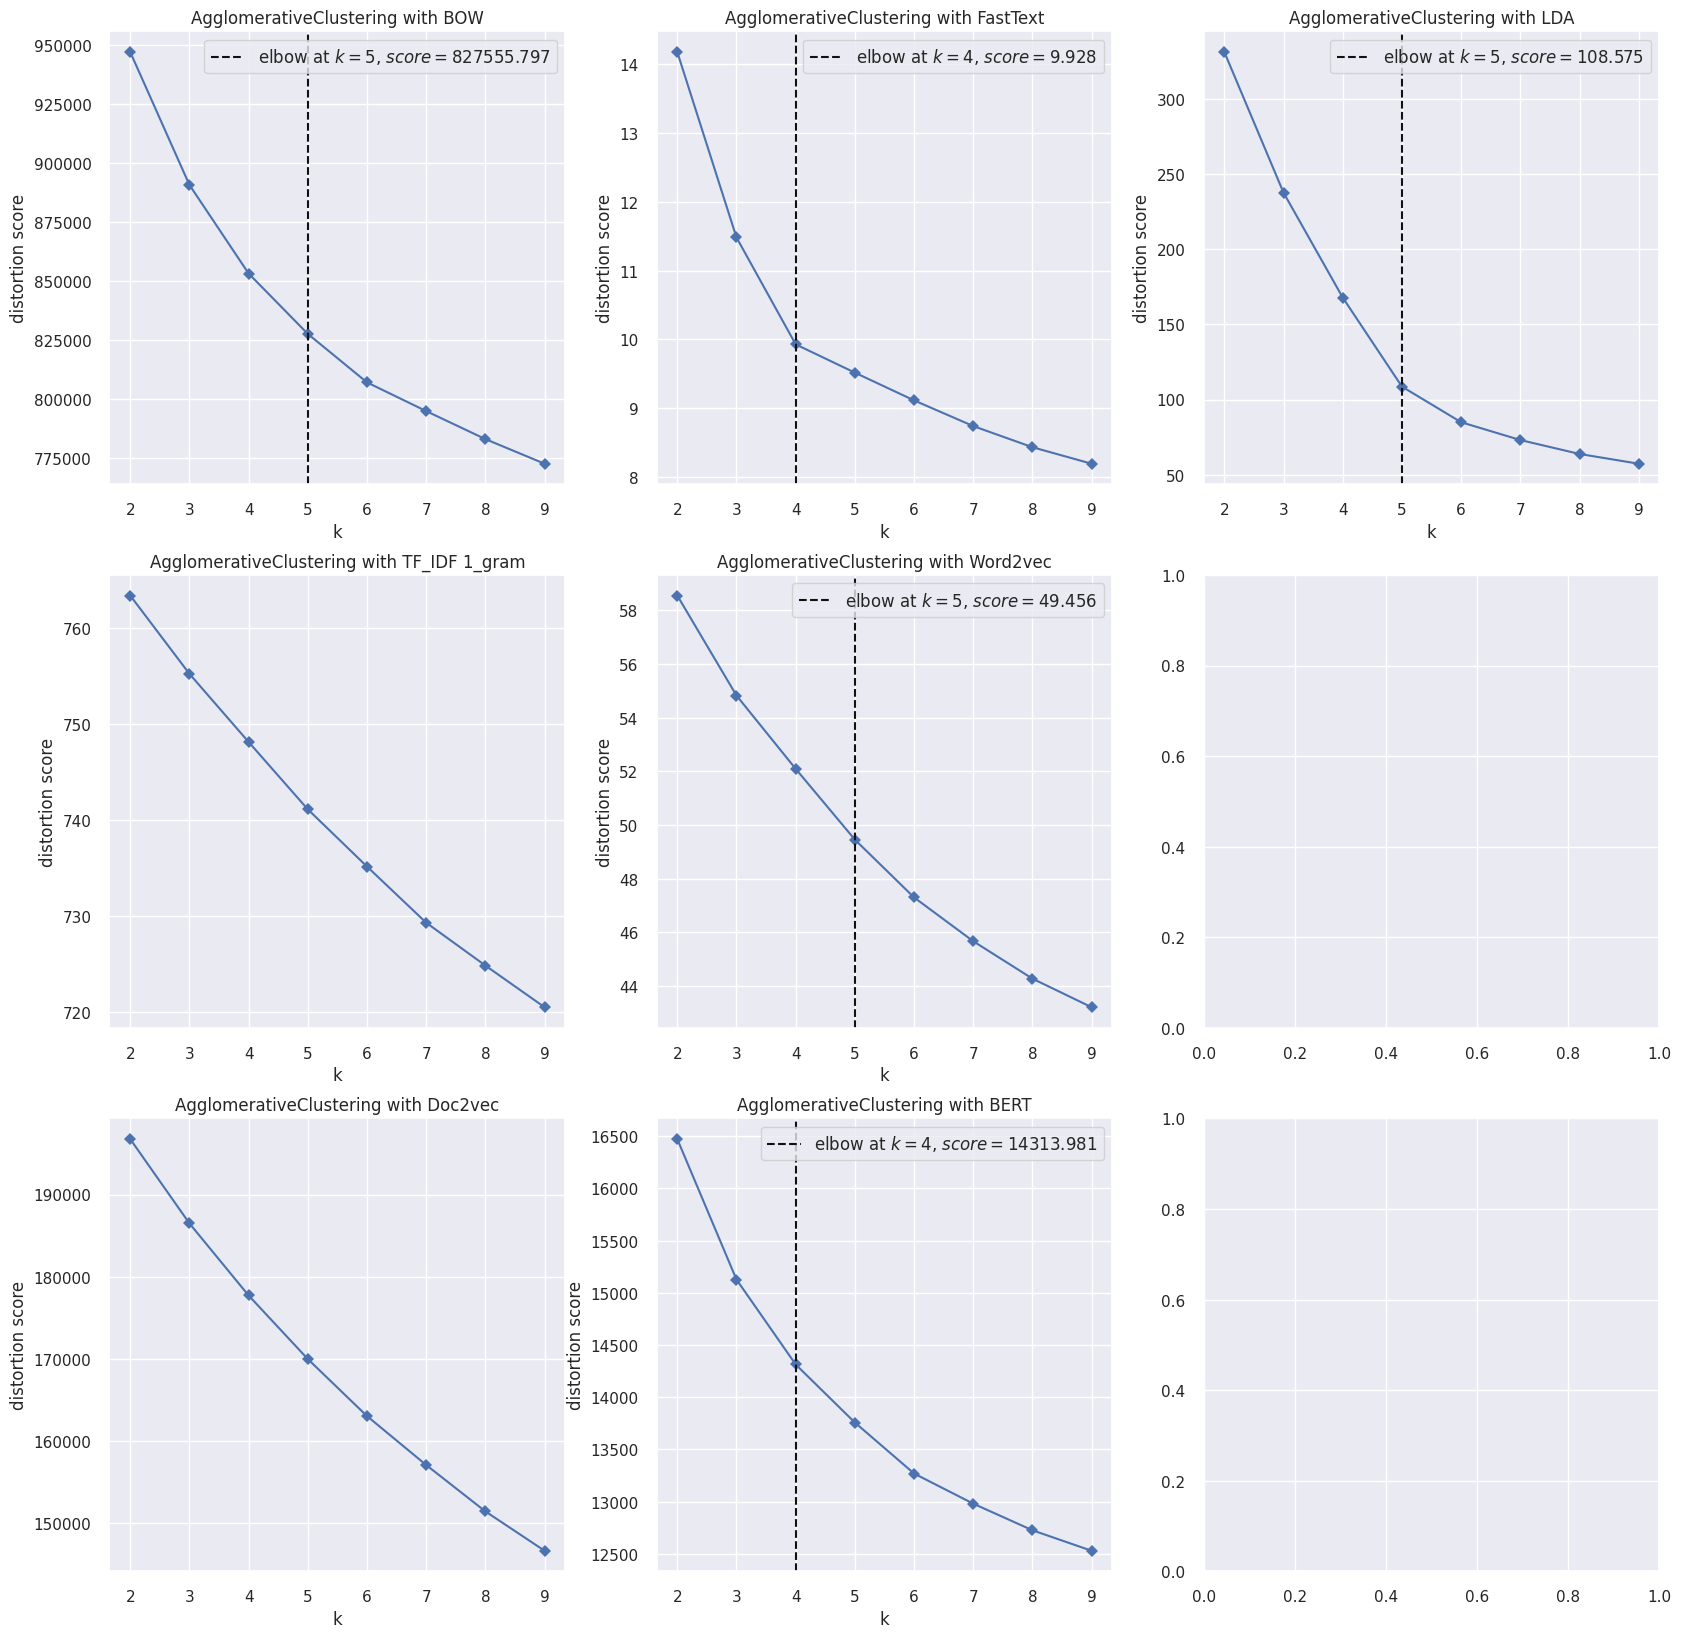

In [78]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
# from yellowbrick.features import FeatureImportances
# from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC
# from sklearn.linear_model import LogisticRegression

x_size , y_size =3,3
fig, axes = plt.subplots(3, 3,figsize=(20,20))

model = AgglomerativeClustering()

visualgrid = []
for i in range(len(text_embedding.keys())):
    ax = axes[i%x_size][i//y_size]
    ax.set_title(text_embedding.keys())
    visualgrid.append(KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False, ax=axes[i%x_size][i//y_size], title = type(model).__name__ + ' with ' + list(text_embedding.keys())[i]))

for vis,key in zip(visualgrid,text_embedding.keys()):
    vis.fit(text_embedding[key])
    vis.ax.set_title(key)
    vis.finalize()

plt.show()

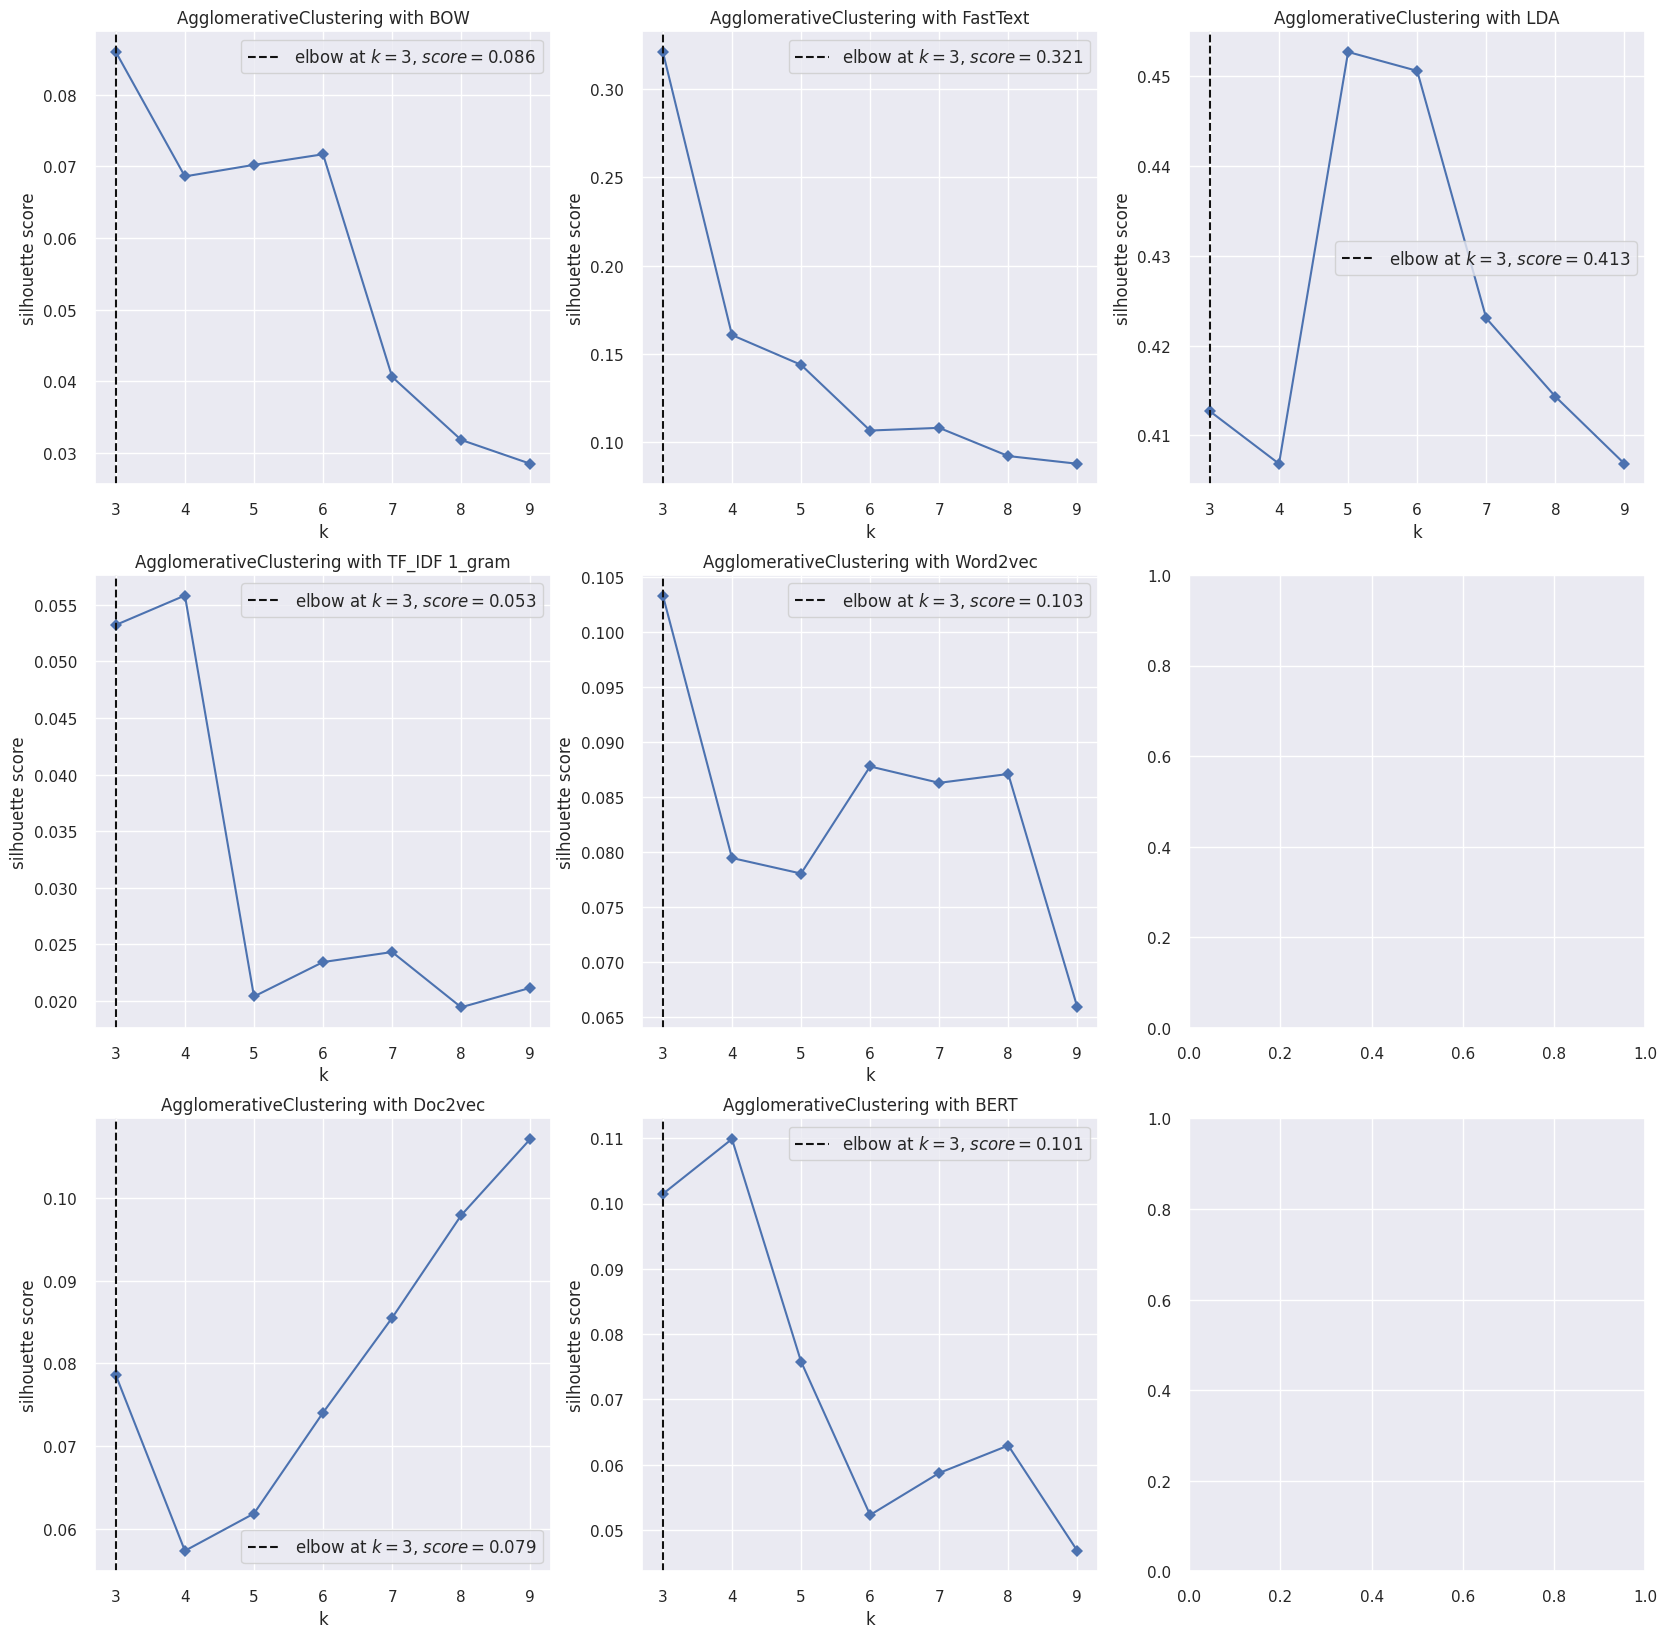

In [79]:
import matplotlib.pyplot as plt

x_size , y_size =3,3
fig, axes = plt.subplots(3, 3,figsize=(20,20))
model = AgglomerativeClustering()

visualgrid = []
for i in range(len(text_embedding.keys())):
    ax = axes[i%x_size][i//y_size]
    ax.set_title(text_embedding.keys())
    visualgrid.append(KElbowVisualizer(model, k=(3,10), metric='silhouette', timings=False, ax=axes[i%x_size][i//y_size], title = type(model).__name__ + ' with ' + list(text_embedding.keys())[i]))

for vis,key in zip(visualgrid,text_embedding.keys()):
    vis.fit(text_embedding[key])
    vis.ax.set_title(key)
    vis.finalize()

plt.show()

In [80]:
from sklearn.cluster import AgglomerativeClustering

models = [AgglomerativeClustering(n_clusters=5),
          # Birch(n_clusters=5),
          # MiniBatchKMeans(n_clusters=5),
          # KMeans(n_clusters=5),
          # SpectralClustering(n_clusters=5)
          ]

models_scores = {}
for model in models:
    print(type(model).__name__)
    kappa_scores = {}
    for key in text_embedding.keys():
        clustering = model.fit(text_embedding[key])
        df_labels = pd.DataFrame({'y_actual':y_df['y_actual'], 'y_pred':clustering.labels_})
        df_labels['y_pred'] = df_labels['y_pred'].apply(lambda val: label_mapping(num=val,y_actual = 'y_actual',y_target='y_pred',df_labels=df_labels ))
        df_labels['y_pred']=df_labels['y_pred'].apply(lambda x: x-1000 if x>20 else x)
        kappa_score = cohen_kappa_score(df_labels['y_actual'], df_labels['y_pred'])
        kappa_scores[key] = kappa_score
        print(key, ':', kappa_score)
    models_scores[type(model).__name__] = kappa_scores

AgglomerativeClustering
BOW : 0.15888888888888886
TF_IDF 1_gram : 0.1644444444444445
Doc2vec : 0.13555555555555554
FastText : 0.12777777777777777
Word2vec : 0.1022222222222221
BERT : 0.04888888888888887
LDA : 0.1677777777777778


In [81]:
for model_scores,model in zip(models_scores.keys(),models):
    fig = go.Figure()
    obj = go.Bar(x = list(models_scores[model_scores].keys()), y = list(models_scores[model_scores].values()))
    fig.add_trace(obj)
    fig.update_layout(title={'text':f'Kappa Score of the {type(model).__name__}','x':0.5},height=600,width=800)
    fig.show()

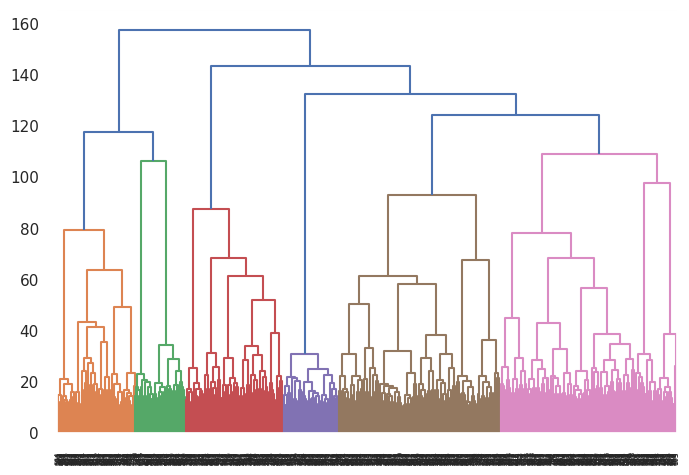

In [82]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(text_embedding['Doc2vec'], method='ward'))
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(text_embedding['Doc2vec'])

In [90]:
Highest_kappa_models = {'Kmeans':vec_kappa['Doc2vec'],'EM':kappa_for_each_transformation['Doc2vec'],'Agglomerative':models_scores['AgglomerativeClustering']['Doc2vec']}

fig = go.Figure()
obj = go.Bar(x = list(Highest_kappa_models.keys()), y = list(Highest_kappa_models.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':f'The BEST models','x':0.5},yaxis_range=[0,1],height=600,width=800)
fig.show()

In [83]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
k=4
embedding=text_embedding['Doc2vec']
model =GaussianMixture(n_components=k,random_state=seed)

y_pred =model.fit_predict(embedding)
#mapping
mapping_df=pd.DataFrame({'y_actual':y_actual,'y_pred':y_pred})
mapping_df['y_pred']=mapping_df['y_pred'].apply(lambda x: label_mapping(x, 'y_actual', 'y_pred', mapping_df))
mapping_df['y_pred']=mapping_df['y_pred'].apply(lambda x: x-1000 if x >20 else x )
# mapping_df=lab(mapping_df)
wrong_examples_pred_actual=mapping_df[mapping_df['y_actual']!=mapping_df['y_pred']]
wrong_idx=mapping_df[mapping_df['y_actual']!=mapping_df['y_pred']].index.tolist()
# print(wrong_idx)
wrong_examples_pred_actual['samples']=list(embedding[wrong_idx,:])

books=pd.DataFrame()
books['labels']=y_actual
books['samples']=list(embedding)
book_means=books.groupby('labels').mean()
wrong_smi=[]
correct_smi=[]
for i in range(len(wrong_examples_pred_actual)):
    true_book=book_means.loc[wrong_examples_pred_actual.iloc[i][0]][:][0].reshape(1,-1)
    wrong_book=book_means.loc[wrong_examples_pred_actual.iloc[i][1]][:][0].reshape(1,-1)
    sample=wrong_examples_pred_actual.iloc[i][2][:].reshape(1,-1)

    wrong_similarity = cosine_similarity(sample, wrong_book)
    right_similarity = cosine_similarity(sample, true_book)
    wrong_smi.append(wrong_similarity[0][0])
    correct_smi.append(right_similarity[0][0])
wrong_examples_pred_actual['Wrong Similarity']=wrong_smi
wrong_examples_pred_actual['Correct Similarity']=correct_smi
wrong_examples_pred_actual

,y_actual,y_pred,samples,Wrong Similarity,Correct Similarity
0,8,2,"[-3.516448, -3.5038714, -2.7353668, 0.8737809,...",0.484623,0.727717
1,7,4,"[-3.1789796, -3.5967364, -0.783847, -0.9339345...",0.592214,0.602819
2,7,4,"[-0.7603135, -0.9734658, -4.1260686, -1.437485...",0.500671,0.620361
3,2,0,"[-3.6944237, -2.6472816, -0.5791283, 4.265212,...",0.583729,0.710681
5,2,0,"[-0.80182296, -2.5937562, -0.09682962, 0.00657...",0.641419,0.638015
...,...,...,...,...,...
995,6,2,"[1.0871633, -2.1044352, -3.6638288, 0.2495656,...",0.475203,0.723352
996,5,4,"[-1.6515865, -0.8442353, -0.4491601, 0.8563901...",0.597881,0.676269
997,9,0,"[-1.8830658, -2.0625064, -1.9298148, -0.079265...",0.493627,0.584632
998,0,3,"[-0.26757544, 1.8185965, -1.0637926, 1.4985969...",0.303180,0.596636


In [91]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
k=5
embedding=text_embedding['Doc2vec']
model =GaussianMixture(n_components=k,random_state=seed)

y_pred =model.fit_predict(embedding)
#mapping
mapping_df=pd.DataFrame({'y_actual':y_actual,'y_pred':y_pred})
mapping_df['y_pred']=mapping_df['y_pred'].apply(lambda x: label_mapping(x, 'y_actual', 'y_pred', mapping_df))
mapping_df['y_pred']=mapping_df['y_pred'].apply(lambda x: x-1000 if x >20 else x )
# mapping_df=lab(mapping_df)
correct_examples_pred_actual=mapping_df[mapping_df['y_actual']==mapping_df['y_pred']]
correct_idx=mapping_df[mapping_df['y_actual']==mapping_df['y_pred']].index.tolist()
# print(wrong_idx)
correct_examples_pred_actual['samples']=list(embedding[correct_idx,:])

books=pd.DataFrame()
books['labels']=y_actual
books['samples']=list(embedding)
book_means=books.groupby('labels').mean()

wrong_smi=[]
correct_smi=[]
for i in range(len(correct_examples_pred_actual)):
    true_book=book_means.loc[correct_examples_pred_actual.iloc[i][0]][:][0].reshape(1,-1)
    wrong_book=book_means.loc[correct_examples_pred_actual.iloc[i][1]][:][0].reshape(1,-1)
    sample=correct_examples_pred_actual.iloc[i][2][:].reshape(1,-1)

    wrong_similarity = cosine_similarity(sample, wrong_book)
    right_similarity = cosine_similarity(sample, true_book)
    wrong_smi.append(wrong_similarity[0][0])
    correct_smi.append(right_similarity[0][0])

correct_examples_pred_actual['Correct Similarity']=correct_smi
correct_examples_pred_actual


,y_actual,y_pred,samples,Correct Similarity
4,0,0,"[1.5964602, -1.844372, -2.334169, -0.38820356,...",0.477911
19,3,3,"[-0.86012596, -3.1253505, -2.8215475, -2.29382...",0.776894
22,3,3,"[-0.8569363, -0.741955, -2.4333053, 0.09181238...",0.820377
30,3,3,"[1.3887925, -1.2135489, -0.844716, 1.3279246, ...",0.886042
33,0,0,"[3.5390034, 0.6051223, -0.21339794, -3.329283,...",0.590054
...,...,...,...,...
984,3,3,"[-1.6606874, -2.5867257, 1.2196847, 0.18229468...",0.833879
986,0,0,"[1.3010774, -0.7318637, -1.8632499, 0.847164, ...",0.553875
987,3,3,"[-0.16622809, -1.4171549, -2.2562332, 1.032524...",0.805568
989,0,0,"[-3.0510054, -4.500786, 0.9529801, 0.004687055...",0.612909


In [94]:
# the wrongly classified examples
wrong_sample_analsis = pd.concat([wrong_examples_pred_actual[['y_actual','y_pred']], data_frame.loc[wrong_idx]['text']], axis=1)
wrong_sample_analsis

,y_actual,y_pred,text
0,8,2,"['“No.”', '', '“I will buy it of you.”', '', '..."
1,7,4,"['Bombay, for which they were now detained at ..."
2,7,4,"['', '“Well, Monsieur Fix,” said Passepartout,..."
3,2,0,"['but the intractable Fogg, as reserved as eve..."
5,2,0,"['journey. But, if he thought of these possibi..."
...,...,...,...
995,6,2,['for the sake of profit send out freights in ...
996,5,4,"['your house.', '', 'Bernick: I suppose so. As..."
997,9,0,"['', 'Bernick: Certainly, certainly--and you t..."
998,0,3,"['Lona: Do you say ""ugh"" to that?', '', 'Hilma..."


In [96]:
from collections import Counter

for i in range(len(wrong_sample_analsis)):
  y_actual = wrong_sample_analsis['y_actual'].iloc[i]
  y_pred = wrong_sample_analsis['y_pred'].iloc[i]
  sample = wrong_sample_analsis['text'].iloc[i]
  counter = Counter(sample.split())
  most_occur = counter.most_common(10)

  true_label = Counter(data_frame.groupby(['topic'], as_index=False).agg({'text': ' '.join}).iloc[y_actual,1].split())
  wrong_label = Counter(data_frame.groupby(['topic'], as_index=False).agg({'text': ' '.join}).iloc[y_pred,1].split())

  word_freq_in_both_books = {}
  for word, occur in most_occur:
    word_freq_in_both_books[word] = {'true_label':true_label[word], 'wrong_label': wrong_label[word],'diff':(true_label[word] - wrong_label[word]) ,'occur': occur}
  print(pd.DataFrame(word_freq_in_both_books).T)
  print('*'*50)
  print('*'*50)

流式输出内容被截断，只能显示最后 5000 行内容。
to           1011         1069   -58      8
their         109          127   -18      6
he            665          542   123      6
And            93           21    72      5
on            223          160    63      5
from          179          161    18      4
**************************************************
**************************************************
     true_label  wrong_label  diff  occur
'            64            5    59     48
the        3299         2383   916     23
and        1603         1196   407     12
my          107           69    38     10
of         1898         1263   635      8
his         462          495   -33      8
to         1284         1069   215      7
And          17           21    -4      5
The         209          102   107      3
me           57           42    15      3
**************************************************
**************************************************
      true_label  wrong_label  diff  occur
